In [1]:
# MODULE IMPORTS ----

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

# Section 1: Model Info / Simulation / Basic Plotting

## 1.1 Access Meta-Data

In [2]:
# List the models currently available
hddm.model_config.model_config.keys()

dict_keys(['ddm_hddm_base', 'full_ddm_hddm_base', 'ddm', 'angle', 'weibull', 'levy', 'full_ddm', 'ornstein', 'ddm_sdv', 'gamma_drift', 'gamma_drift_angle', 'ds_conflict_drift', 'ds_conflict_drift_angle', 'ddm_par2', 'ddm_par2_no_bias', 'ddm_par2_angle_no_bias', 'ddm_par2_weibull_no_bias', 'ddm_seq2', 'ddm_seq2_no_bias', 'ddm_seq2_angle_no_bias', 'ddm_seq2_weibull_no_bias', 'ddm_mic2_adj', 'ddm_mic2_adj_no_bias', 'ddm_mic2_adj_angle_no_bias', 'ddm_mic2_adj_weibull_no_bias', 'tradeoff_no_bias', 'tradeoff_angle_no_bias', 'tradeoff_weibull_no_bias', 'tradeoff_conflict_gamma_no_bias', 'race_no_bias_3', 'race_no_bias_angle_3', 'race_no_bias_4', 'race_no_bias_angle_4', 'lca_no_bias_3', 'lca_no_bias_angle_3', 'lca_no_bias_4', 'lca_no_bias_angle_4', 'full_ddm2'])

In [3]:
hddm.model_config.model_config['angle']

{'doc': 'Model formulation is described in the documentation under LAN Extension.\nMeant for use with the extension.',
 'params': ['v', 'a', 'z', 't', 'theta'],
 'params_trans': [0, 0, 1, 0, 0],
 'params_std_upper': [1.5, 1.0, None, 1.0, 1.0],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.001, -0.1], [3.0, 3.0, 0.9, 2.0, 1.3]],
 'boundary': <function ssms.basic_simulators.boundary_functions.angle(t=1, theta=1)>,
 'params_default': [0.0, 1.0, 0.5, 0.001, 0.1],
 'hddm_include': ['v', 'a', 't', 'z', 'theta'],
 'choices': [-1, 1],
 'slice_widths': {'v': 1.5,
  'v_std': 1,
  'a': 1,
  'a_std': 1,
  'z': 0.1,
  'z_trans': 0.2,
  't': 0.01,
  't_std': 0.15,
  'theta': 0.1,
  'theta_std': 0.2}}

In [4]:
# Metadata
model = 'angle'
n_samples = 1000

## 1.2 Generate Data

In [5]:
help(simulator_h_c)

Help on function simulator_h_c in module hddm.simulators.hddm_dataset_generators:

simulator_h_c(data=None, n_subjects=10, n_trials_per_subject=100, model='ddm_hddm_base', conditions=None, depends_on=None, regression_models=None, regression_covariates=None, group_only_regressors=True, group_only=['z'], fixed_at_default=None, p_outlier=0.0, outlier_max_t=10.0, **kwargs)
    Flexible simulator that allows specification of models very similar to the hddm model classes. Has two major modes. When data 
    
    is supplied the function generates synthetic versions of the provided data. If no data is provided, you can supply
    a varied of options to create complicated synthetic datasets from scratch.
    
    :Arguments:
        data: pd.DataFrame <default=None>
            Actual covariate dataset. If data is supplied its covariates are used instead of generated.
        n_subjects: int <default=5>
            Number of subjects in the datasets
        n_trials_per_subject: int <default=5

In [6]:
data, full_parameter_dict = simulator_h_c(n_subjects = 1,
                                          n_trials_per_subject = n_samples,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = None,
                                          regression_covariates = None,
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = ['v', 'a', 'z', 't', 'theta'])

In [7]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.476013,1.0,0,0.0,1.0,0.5,0.001,0.1
1,3.024963,0.0,0,0.0,1.0,0.5,0.001,0.1
2,2.612993,0.0,0,0.0,1.0,0.5,0.001,0.1
3,0.728994,1.0,0,0.0,1.0,0.5,0.001,0.1
4,0.284000,1.0,0,0.0,1.0,0.5,0.001,0.1
...,...,...,...,...,...,...,...,...
995,0.166000,1.0,0,0.0,1.0,0.5,0.001,0.1
996,0.729994,1.0,0,0.0,1.0,0.5,0.001,0.1
997,1.030992,0.0,0,0.0,1.0,0.5,0.001,0.1
998,0.450998,1.0,0,0.0,1.0,0.5,0.001,0.1


In [8]:
full_parameter_dict

{'v': 0.0, 'a': 1.0, 'z': 0.5, 't': 0.001, 'theta': 0.1}

## 1.3 First Plot

In [9]:
help(hddm.plotting.plot_from_data)

Help on function plot_from_data in module hddm.plotting:

plot_from_data(df, generative_model='ddm_hddm_base', plot_func=None, columns=None, save=False, save_name=None, make_transparent=False, show=True, path=None, groupby='subj_idx', figsize=(8, 6), format='png', keep_frame=True, keep_title=True, **kwargs)
    Plot data from a hddm ready DataFrame.
    
    Arguments:
    
        df : pd.DataFrame
            HDDM ready dataframe.
    
        value_range : numpy.ndarray
            Array to evaluate the likelihood over.
    
    Optional:
        columns : int <default=3>
            How many columns to use for plotting the subjects.
    
        bins : int <default=100>
            How many bins to compute the data histogram over.
    
        figsize : (int, int) <default=(8, 6)>
    
        save : bool <default=False>
            Whether to save the figure to a file.
    
        path : str <default=None>
            Save figure into directory prefix
    
        format : str or

In [10]:
help(hddm.plotting._plot_func_model)

Help on function _plot_func_model in module hddm.plotting:

_plot_func_model(bottom_node, axis, value_range=None, samples=10, bin_size=0.05, add_data_rts=True, add_data_model=True, add_data_model_keep_slope=True, add_data_model_keep_boundary=True, add_data_model_keep_ndt=True, add_data_model_keep_starting_point=True, add_data_model_markersize_starting_point=50, add_data_model_markertype_starting_point=0, add_data_model_markershift_starting_point=0, add_posterior_uncertainty_model=False, add_posterior_uncertainty_rts=False, add_posterior_mean_model=True, add_posterior_mean_rts=True, add_trajectories=False, data_label='Data', secondary_data=None, secondary_data_label=None, secondary_data_color='blue', linewidth_histogram=0.5, linewidth_model=0.5, legend_fontsize=12, legend_shadow=True, legend_location='upper right', data_color='blue', posterior_mean_color='red', posterior_uncertainty_color='black', alpha=0.05, delta_t_model=0.01, add_legend=True, **kwargs)
    Calculate posterior predict

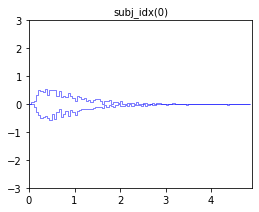

In [11]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             hist_bottom = 0, # this makes the histograms start from 0. Otherwise https://github.com/hddm-devs/hddm/blob/master/hddm/plotting.py#L1080 makes them start from 2
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': False})
plt.show()

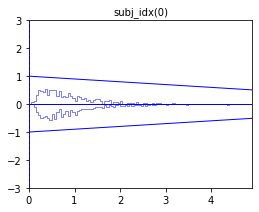

In [12]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             hist_bottom = 0,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

# Section 2: Single Subject (or collapsed) Data

In [13]:
# Metadata
nmcmc = 1500
model = 'angle'
n_samples = 1000
includes = hddm.model_config.model_config[model]['hddm_include']

In [14]:
data, full_parameter_dict = simulator_h_c(n_subjects = 1,
                                          n_trials_per_subject = n_samples,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = None,
                                          regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [15]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.688567,0.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
1,1.473570,1.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
2,2.025570,0.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
3,2.362586,1.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
4,1.752567,1.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
...,...,...,...,...,...,...,...,...
995,1.379571,0.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
996,1.481570,0.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
997,0.991574,1.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178
998,2.165576,0.0,0,-1.351221,1.32992,0.794821,0.911574,0.493178


In [16]:
hddmnn_model = hddm.HDDMnn(data,
                           informative = False,
                           include = includes,
                           p_outlier = 0.01,
                           w_outlier = 0.1,
                           model = model,)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [17]:
hddmnn_model.sample(nmcmc,
                    burn = 500)

 [-----------------100%-----------------] 1501 of 1500 complete in 231.2 sec

## 2.1 Visualization

tracename: 
v
tracename: 
a
tracename: 
z
tracename: 
t
tracename: 
theta


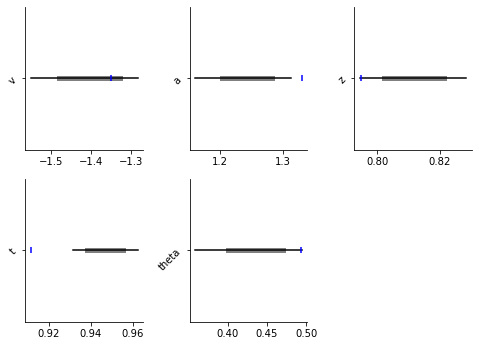

In [18]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()


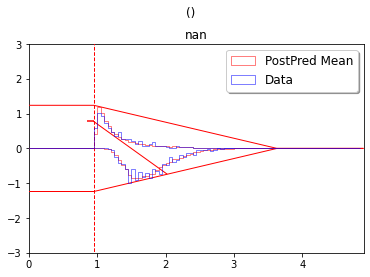

In [19]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        hist_bottom = 0,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'samples': 200})
plt.show()

Plotting v
Plotting a
Plotting z
Plotting t
Plotting theta


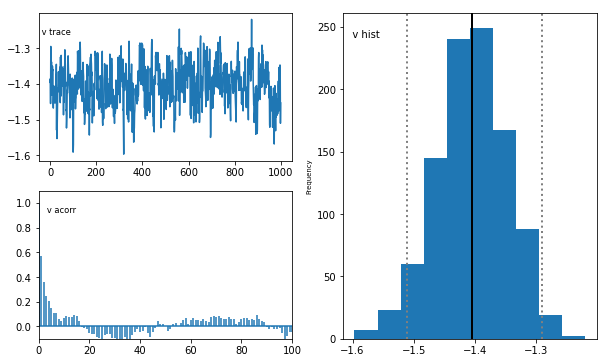

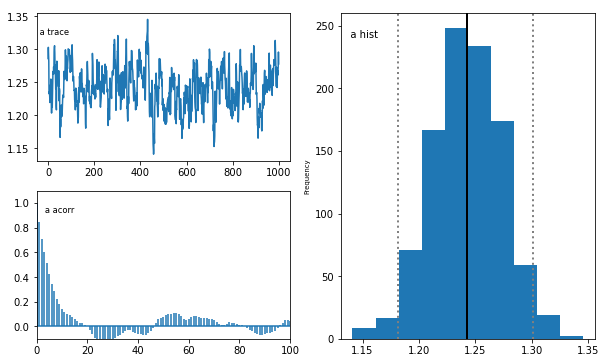

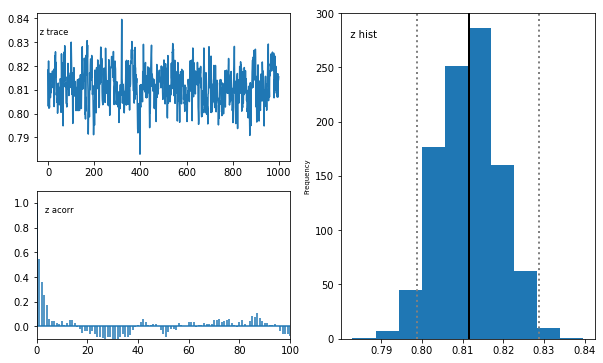

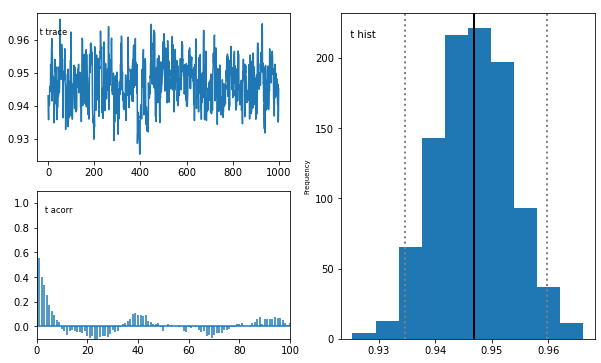

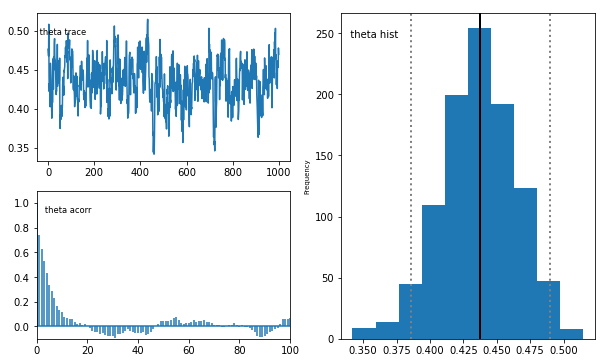

In [20]:
# TAKING A LOOK AT THE POSTERIOR TRACES
hddmnn_model.plot_posteriors(hddm.simulators.model_config[model]['params'])
plt.show()

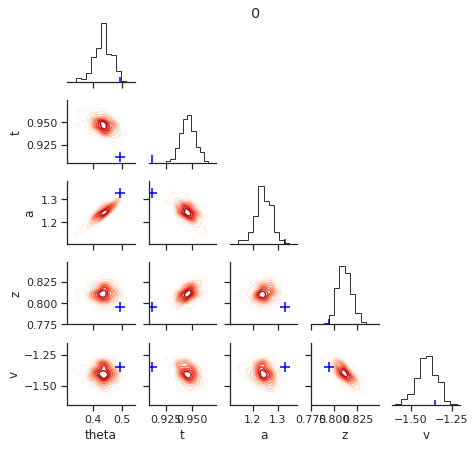

In [21]:
hddm.plotting.plot_posterior_pair(hddmnn_model, save = False,
                                  parameter_recovery_mode = True,
                                  samples = 500,
                                  figsize = (6, 6))

# Section 3: Hierarchical Models

In [22]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 200
n_subjects = 10

In [23]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = simulator_h_c(data = None,
                                          n_subjects = n_subjects,
                                          n_trials_per_subject = n_trials_per_subject,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = None,
                                          regression_covariates = None,
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

new round of data simulation because parameter bounds where violated


In [24]:
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           is_group_model = True,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [25]:
hddmnn_model.sample(nmcmc,
                    burn = 100) # if you want to save the model specify extra arguments --> dbname='traces.db', db='pickle'. # hddmnn_model.save('test_model')

 [-----------------100%-----------------] 1001 of 1000 complete in 877.0 sec

tracename: 
v
tracename: 
v_subj.0
tracename: 
v_subj.1
tracename: 
v_subj.2
tracename: 
v_subj.3
tracename: 
v_subj.4
tracename: 
v_subj.5
tracename: 
v_subj.6
tracename: 
v_subj.7
tracename: 
v_subj.8
tracename: 
v_subj.9
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
a_subj.5
tracename: 
a_subj.6
tracename: 
a_subj.7
tracename: 
a_subj.8
tracename: 
a_subj.9
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
z_subj.5
tracename: 
z_subj.6
tracename: 
z_subj.7
tracename: 
z_subj.8
tracename: 
z_subj.9
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracename: 
t_subj.2
tracename: 
t_subj.3
tracename: 
t_subj.4
tracename: 
t_subj.5
tracename: 
t_subj.6
tracename: 
t_subj.7
tracename: 
t_subj.8
tracename: 
t_subj.9
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2
tracename: 

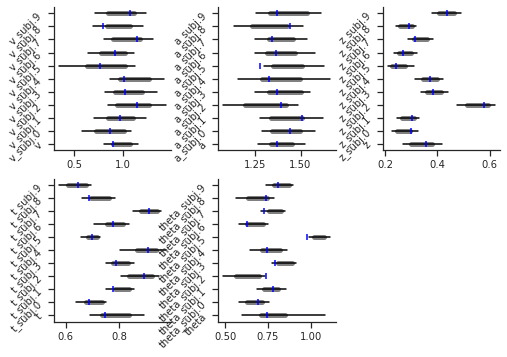

In [26]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

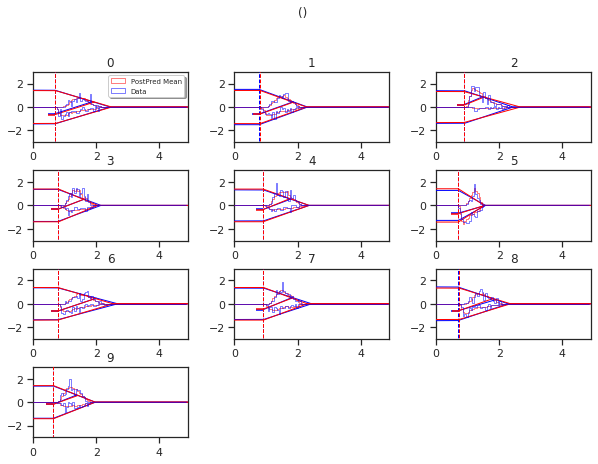

In [28]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 3,
                                        figsize = (10, 7),
                                        groupby = ['subj_idx'],
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        hist_bottom = 0,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_mean_rts': True,
                                        'add_posterior_mean_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_uncertainty_model': False,
                                        'samples': 200,
                                        'legend_fontsize': 7.})

# Section 4: Parameter varies by Condition

In [29]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 500

# We allow the boundary conditions to vary
depends_on = {'a': ['c_one']}

# They will depend on a fictious column 'c_one' that specifies
# levels / conditions
conditions = {'c_one': ['low', 'medium', 'high']}

In [30]:
data, full_parameter_dict = simulator_h_c(n_subjects = 1,
                                          n_trials_per_subject = n_trials_per_subject,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = conditions,
                                          depends_on = depends_on,
                                          regression_models = None,
                                          regression_covariates = None,
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [31]:
# Let's check the resulting parameter vector
full_parameter_dict

{'v': -1.186695710678248,
 't': 0.865378415987268,
 'theta': 0.4594309736877299,
 'z': 0.6344975850831907,
 'a(high)': 0.7290049427776472,
 'a(low)': 1.4158216511715547,
 'a(medium)': 2.409237747201343}

In [32]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = False,
                           depends_on = depends_on)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [33]:
hddmnn_model.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 1000 of 1000 complete in 174.3 sec

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

In [ ]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200})
plt.show()